# Recap about the fundamentals of Deep Learning

📆 What's on the agenda for this recap?

- ***Intro***: How to read the docs
- ***Part 1***: Tensorflow de-mystified (👨🏻‍🏫 Teacher-led)
- ***Part 2***: Boston Housing Challenge (👩‍🎓 Student-led)

## Intro: How to read the docs?

✅ [Tensorflow.org](https://www.tensorflow.org/overview) provides you with two main pages to refer to:
- [Tutorial](https://www.tensorflow.org/tutorials)
- [Guide](https://www.tensorflow.org/guide)
- ***These should be your go-to pages***. You can even run `Colab-Notebooks` of these tutorials

&nbsp;

✅ TensorFlow [API docs](https://www.tensorflow.org/api_docs/python/tf/) contains only essential elements and advanced notions
- It pops up in Google Search in priority
- [Sometimes](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), it can give you references to related Tutorials or Guides
- ***Use it as THE single source of truth***

&nbsp;

❌ [Keras.io](https://keras.io/about/) is somewhat redundant with the TensorFlow documentation
- It contains nice tutorials and examples but...
- ...use it only you don't find what you need on `Tensorflow.Keras`'s website
- ***Don't use it for the docs***

## Part I - Tensorflow demystified 
_(🧑🏻‍🏫 Teacher-led)_

👉 Goal: Using Tensorflow, create a dummy dataset and fit a dummy model with it

### (1) Tensors?

📚 [Online Guide](https://www.tensorflow.org/guide/tensor)

In [ ]:
# It's OK to import everything for notebook based experimentation!
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
# Tensors are wrappers around numpy objects

X = tf.constant([[1., 1., 1.],
                 [1., 1., 1.],
                 [1., 1., 1.]])
X

In [ ]:
tf.ones((3,3))

In [ ]:
x = X.numpy()
x

In [ ]:
# Tensors have a shape
X.shape

In [ ]:
# Tensors can be initialized from Numpy objects
tf.constant(x)

In [ ]:
# They can be manipulated with syntax that is similar to Numpy
tf.add(X,X)

In [ ]:
# Conversely, Numpy also accept Tensor elements!
np.add(X,X)

In [ ]:
# Example of a custom MSE loss function using Tensors

def loss(y_true, y_pred):
    err = y_true - y_pred
    return tf.reduce_mean(tf.square(err))

y_true = tf.ones((10,3))
y_pred = tf.ones((10,3)) + 0.1 * tf.random.normal((10,3))

loss(y_true, y_pred)

#### Other Tensors?

**Sparse Tensors**
<img src="https://github.com/lewagon/data-images/blob/master/DL/sparse_tensors.png?raw=true">

In [ ]:
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
sparse_tensor.shape

**Ragged Tensors**
<img src="https://raw.githubusercontent.com/lewagon/data-images/master/DL/ragged_tensors.png">

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

ragged_tensor = tf.ragged.constant(ragged_list)
ragged_tensor.shape

### (2) Build a neural network with `Sequential API`

👉 Let's generate 100 random observations `X` of 10 features each, and a unidimensional target `y` 

In [ ]:
# Let's generate 100 observations of with 10 features for each of them
X = tf.random.uniform((100,10))

In [ ]:
# And create our dummy target as simply the mean of each observation
y = tf.reduce_mean(X, axis=1)
y.shape

👉 Let's build a simple dense model that "works"

In [ ]:
from tensorflow.keras import Sequential, layers

In [ ]:
# Usual syntax

model = Sequential()
model.add(layers.Dense(30, input_dim=10, activation='relu'))
#model.add(layers.Dense(30, input_shape=(10,), activation='relu'))
model.add(layers.Dense(1))
model.summary()

In [ ]:
# Equivalent
model = Sequential([
    layers.Dense(30, input_shape=(10, ), activation='relu'),
    layers.Dense(1),
])
model.summary()

In [ ]:
# What if we don't specify input_dim?
model = Sequential()
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

In [ ]:
model.summary()

In [ ]:
try:
    model.summary()
    
except ValueError as e:
    print(e)

In [ ]:
# One can still access all the layers individually
model.layers

In [ ]:
# And call the layer with a "tensor" as input
x1 = model.layers[0](X)

# x1 is our activation from layer 1, with random (initial) weights
x1.shape

In [ ]:
# x2 is our output
x2 = model.layers[1](x1)
x2.shape

### (3) Keras Input layer

You will often encounter this in the docs:
```python
keras.Input(shape=(10,))
```
Instead of passing 100 **real** observations to your layers, simply pass a `keras.Input` of `None` observations of similar shape (10,).  

It is used for computation optimization purposes (memory pre-allocation and network graphs for parallelization) 

In [ ]:
inputs = keras.Input(shape=(10,))
inputs

In [ ]:
model.layers[0](inputs)

In [ ]:
x = model.layers[0](inputs) # Input layer
x = layers.Dense(30, activation='relu')(inputs) # First layer output
x = layers.Dense(20, activation='relu')(x) # Second layer output
x = layers.Dense(10, activation='relu')(x) # Third layer output
outputs = layers.Dense(1)(x)               # Final layer output

outputs.shape

In [ ]:
# Keras allows you to build a model from an input and output layer
model = keras.Model(inputs, outputs)
model.summary()

☝️ This way of building models is called Keras [Functional API](https://www.tensorflow.org/guide/keras/functional)
- as opposed to [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential): `model.add(...)`
- It is mandatory for complex (non-sequential) architecture...
- Used everywhere in the docs

## Part II - Boston Housing Challenge 
(👩‍🎓Student-led)

### (1) Data

`Tensorflow.Keras` provides `Toy Datasets` that can be found <a href="https://www.tensorflow.org/api_docs/python/tf/keras/datasets">here</a>

Let's load the **`Boston Housing`** dataset.

In [1]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()

X_train.shape

2022-05-16 17:30:18.931666: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 17:30:18.931758: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


(404, 13)

In [2]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [3]:
y_train.shape

(404,)

❓ Normalize your data (by the mean of the train set for instance)

In [4]:
X_train_norm = X_train/X_train.mean(axis=0)
X_test_norm = X_test/X_train.mean(axis=0)

### (2) Declare the general architecture of your model



❓ Import Keras and declare a Sequential model

In [5]:
from tensorflow.keras import Sequential, layers
# from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()

❓ Add a Dense layer with 50 neurons and the `relu` activation function. Do not forget to specify your `input_dim` for the first layer.

In [33]:
X_train.shape[1]

13

In [34]:
model.add(layers.Dense(50, activation='relu', input_dim=X_train.shape[1]))

❓ Add a second fully connected layer, with 20 neurons and the `relu` activation function.

In [35]:
model.add(layers.Dense(20, activation='relu'))

❓ Add a last layer that suits your regression task

In [36]:
model.add(layers.Dense(1, activation='linear'))

❓ Check the number of parameters of your model.

Re-count them manually to make sure you understood the numbers of parameters involved in each layer of your Dense Neural Network

In [37]:
(13*50+50) + (20*50+20) + (20+1)

1741

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                700       
                                                                 
 dense_7 (Dense)             (None, 20)                1020      
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


### (3) Define how your model is trained
 


❓ Compile the model with the `adam` `optimizer` and the `mse` `loss`

In [39]:
model.compile(loss='mse', optimizer='adam')

❓Run the model on this random data; don't forget to select a number of `epochs` and a `batch_size`. Store the returned result in `history`.

In [40]:
history = model.fit(X_train_norm, y_train, batch_size=8, epochs=40)

Epoch 1/40
51/51 [==============================] - 1s 3ms/step - loss: 470.3212
Epoch 2/40
51/51 [==============================] - 0s 3ms/step - loss: 221.8295
Epoch 3/40
51/51 [==============================] - 0s 3ms/step - loss: 113.2287
Epoch 4/40
51/51 [==============================] - 0s 3ms/step - loss: 81.6034
Epoch 5/40
51/51 [==============================] - 0s 3ms/step - loss: 69.4693
Epoch 6/40
51/51 [==============================] - 0s 3ms/step - loss: 64.1016
Epoch 7/40
51/51 [==============================] - 0s 3ms/step - loss: 61.1076
Epoch 8/40
51/51 [==============================] - 0s 3ms/step - loss: 57.7913
Epoch 9/40
51/51 [==============================] - 0s 3ms/step - loss: 54.0002
Epoch 10/40
51/51 [==============================] - 0s 3ms/step - loss: 52.0212
Epoch 11/40
51/51 [==============================] - 0s 3ms/step - loss: 50.0321
Epoch 12/40
51/51 [==============================] - 0s 3ms/step - loss: 47.2947
Epoch 13/40
51/51 [===============

❓ Plot the model convergence

In [21]:
import matplotlib.pyplot as plt

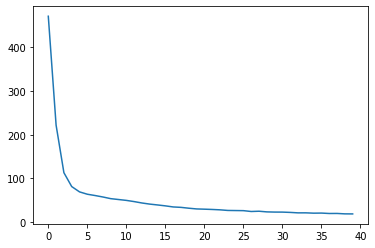

In [41]:
plt.plot(history.history['loss'])

In [42]:
model.evaluate(X_test_norm, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 32.6837


32.683738708496094

❓ Write an entire model with its compilation within an `init_model` function

In [ ]:
rmsle

In [60]:
def init_model(X):
    model = Sequential()
    
    model.add(layers.Dense(80, activation='relu', input_dim=X.shape[-1]))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', optimizer='adam')
    
    return model

In [61]:
model = init_model(X_train_norm)
history = model.fit(X_train_norm, y_train, validation_split=0.2, batch_size=8, epochs=120)

Epoch 1/120
41/41 [==============================] - 1s 10ms/step - loss: 459.4930 - val_loss: 286.5315
Epoch 2/120
41/41 [==============================] - 0s 5ms/step - loss: 119.9770 - val_loss: 105.4724
Epoch 3/120
41/41 [==============================] - 0s 5ms/step - loss: 74.2213 - val_loss: 76.4009
Epoch 4/120
41/41 [==============================] - 0s 5ms/step - loss: 62.3145 - val_loss: 67.3871
Epoch 5/120
41/41 [==============================] - 0s 5ms/step - loss: 58.0955 - val_loss: 62.3071
Epoch 6/120
41/41 [==============================] - 0s 5ms/step - loss: 52.7184 - val_loss: 57.3487
Epoch 7/120
41/41 [==============================] - 0s 5ms/step - loss: 48.1136 - val_loss: 54.2376
Epoch 8/120
41/41 [==============================] - 0s 5ms/step - loss: 44.1998 - val_loss: 49.2815
Epoch 9/120
41/41 [==============================] - 0s 5ms/step - loss: 41.1264 - val_loss: 46.1760
Epoch 10/120
41/41 [==============================] - 0s 5ms/step - loss: 36.3435 - va

41/41 [==============================] - 0s 5ms/step - loss: 10.1360 - val_loss: 25.3703
Epoch 82/120
41/41 [==============================] - 0s 5ms/step - loss: 9.8261 - val_loss: 27.0865
Epoch 83/120
41/41 [==============================] - 0s 6ms/step - loss: 9.1188 - val_loss: 26.7760
Epoch 84/120
41/41 [==============================] - 0s 6ms/step - loss: 9.6982 - val_loss: 27.7797
Epoch 85/120
41/41 [==============================] - 0s 5ms/step - loss: 9.3005 - val_loss: 26.2241
Epoch 86/120
41/41 [==============================] - 0s 5ms/step - loss: 8.4585 - val_loss: 31.0484
Epoch 87/120
41/41 [==============================] - 0s 5ms/step - loss: 8.9878 - val_loss: 28.8780
Epoch 88/120
41/41 [==============================] - 0s 5ms/step - loss: 9.5170 - val_loss: 28.6218
Epoch 89/120
41/41 [==============================] - 0s 5ms/step - loss: 8.6228 - val_loss: 34.9455
Epoch 90/120
41/41 [==============================] - 0s 5ms/step - loss: 8.6411 - val_loss: 26.6457
Ep

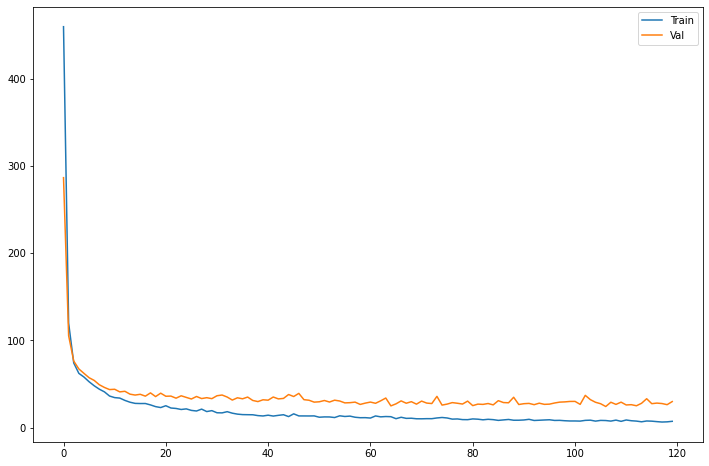

In [63]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.legend()

You are advised to systematically rebuild a model (with an init function) before fitting some data in order to re-initialize the model's parameters.

The model you just wrote is suited for regression tasks.

What if we want to perform a binary classification task?

❓ Write another `init_model_2` function in which you will change:
* the last layer of the architecture 
* and the compilation method

used in a binary class classification problem.

In [45]:
def init_model2(X):
    model = Sequential()
    
    model.add(layers.Dense(50, activation='relu', input_dim=X.shape[-1]))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    return model

❓ Write a last function to define a model for a classification problem with 10 classes.

In [46]:
def init_model3(X):
    model = Sequential()
    
    model.add(layers.Dense(50, activation='relu', input_dim=X.shape[-1]))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model